In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib notebook

In [ ]:
# Eq 15
def f(z):
    # Polynomial coefficients
    a = [-6.71387E-3, -1.55115, -5.13306E-2, -5.49164E-2]
    # Polynomial expansion
    p = lambda z: a[0] + a[1]*z**1 + a[2]*z**2 + a[3]*z**3
    return 1 / (1 + np.exp(p(z)))

# Eq 10
def func(z, beta, x0):
    return z / (np.sqrt(2)*beta) + x0

In [ ]:
# Load x and y data
xdata = 
ydata =

# Normalise y data
ydata /= max(ydata)

# Calc z from y data
zdata = norm.ppf(ydata)

popt, pcov = curve_fit(func, zdata, ydata)
print(popt)

<IPython.core.display.Javascript object>


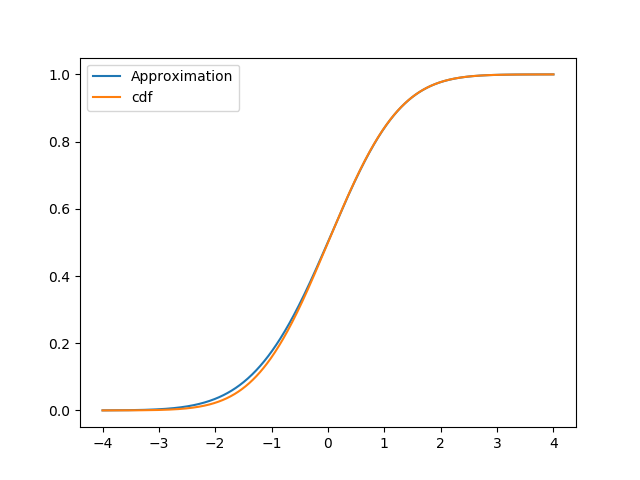

In [24]:
z = np.linspace(-4, 4, num=1000)
fig, ax = plt.subplots()
ax.plot(z, f(z), label='Approximation')
ax.plot(z, norm.cdf(z), label='cdf')
ax.legend()

<IPython.core.display.Javascript object>


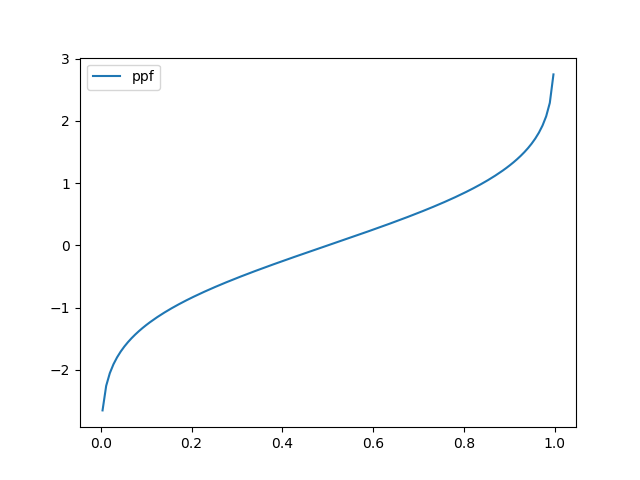

In [25]:
fig, ax = plt.subplots()
ax.plot(z, norm.ppf(z), label='ppf')
ax.legend()